In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv('listings.csv.gz')

In [3]:
df2 = df.copy()

In [4]:
df_numeric = df.select_dtypes(include=['float64'])

df_string = df.select_dtypes(include=['object'])

df_int = df.select_dtypes(include=['int'])

In [5]:
potential_important_string = ['host_since', 'host_location', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',\
                             'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',\
                             'property_type', 'room_type', 'bathrooms_text', 'instant_bookable', 'last_review']

In [6]:
df2.dropna(subset = ['host_since', 'host_is_superhost', 'host_identity_verified'], inplace = True)

In [7]:
# cleaning and engineering host_since
df2['host_since'] = pd.to_datetime(df2['host_since'])
df2['months_active'] = (dt.datetime.today() - df2['host_since'])/np.timedelta64(1, 'M')
df2['months_active'] = df2['months_active'].astype(int)
df2.drop(columns = 'host_since', axis = 1, inplace = True)

In [8]:
df2['host_location'].value_counts()
# too many entries to clean, ignore for now

Amsterdam, North Holland, Netherlands        10046
Amsterdam, North Holland, The Netherlands     3515
NL                                            1549
Amsterdam, Noord-Holland, The Netherlands     1153
Netherlands                                    520
                                             ...  
Vouillé, Nouvelle-Aquitaine, France              1
Dornbirn, Vorarlberg, Austria                    1
Colorado, United States                          1
Birmingham, England, United Kingdom              1
Stoke-on-Trent, England, United Kingdom          1
Name: host_location, Length: 534, dtype: int64

In [9]:
df2['host_response_rate'] = df2['host_response_rate'].str.replace('%','')
df2['host_response_rate'] = pd.to_numeric(df2['host_response_rate'])
print(df2['host_response_rate'].describe())
# Given most of the values being missing, we will replace missing values with mean
df2['host_response_rate'].fillna(df2['host_response_rate'].mean(), inplace = True)
# print(df2['host_response_rate'].describe())

count    3937.000000
mean       86.042418
std        28.633557
min         0.000000
25%        89.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_response_rate, dtype: float64


In [10]:
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace('%','')
df2['host_acceptance_rate'] = pd.to_numeric(df2['host_acceptance_rate'])
print(df2['host_acceptance_rate'].describe())
# Given most of the values being missing, we will replace missing values with mean
df2['host_acceptance_rate'].fillna(df2['host_acceptance_rate'].mean(), inplace = True)
print(df2['host_acceptance_rate'].describe())

count    7796.000000
mean       77.234864
std        33.575089
min         0.000000
25%        63.000000
50%        98.000000
75%       100.000000
max       100.000000
Name: host_acceptance_rate, dtype: float64
count    18228.000000
mean        77.234864
std         21.956729
min          0.000000
25%         77.234864
50%         77.234864
75%         93.000000
max        100.000000
Name: host_acceptance_rate, dtype: float64


In [11]:
print(df2['host_is_superhost'].value_counts())
# only true false values, convert them to 0 and 1 categorical
df2['host_is_superhost'].replace({'t': 1, 'f': 0}, inplace = True)
df2['host_is_superhost'].value_counts()

f    15849
t     2379
Name: host_is_superhost, dtype: int64


0    15849
1     2379
Name: host_is_superhost, dtype: int64

In [12]:
print(df2['host_identity_verified'].value_counts())
# only true false values, convert them to 0 and 1 categorical
df2['host_identity_verified'].replace({'t': 1, 'f': 0}, inplace = True)
df2['host_identity_verified'].value_counts()

t    11918
f     6310
Name: host_identity_verified, dtype: int64


1    11918
0     6310
Name: host_identity_verified, dtype: int64

In [13]:
df2['neighbourhood'].value_counts()
# too many values, ignore for now

Amsterdam, Noord-Holland, Netherlands                       9487
Amsterdam, North Holland, Netherlands                       1483
Amsterdam, NH, Netherlands                                   697
Amsterdam, Netherlands                                       110
Amsterdam-Zuidoost, Noord-Holland, Netherlands                57
                                                            ... 
Amsterdam, Zeedijk, Netherlands                                1
Amsterdam, Noord-Holland, NL, Noord-Holland, Netherlands       1
Nederland, North Holland, Netherlands                          1
Amsterdam, VX, Netherlands                                     1
Duivendrecht, Noord-Holland, Netherlands                       1
Name: neighbourhood, Length: 67, dtype: int64

In [14]:
print(df2['neighbourhood_cleansed'].value_counts())
# manageable number of values, will do one hot encoding
neighbourhood_dummies = pd.get_dummies(df2['neighbourhood_cleansed'], prefix = 'Neighbourhood', drop_first=True)
df2_dummies = pd.concat([df2, neighbourhood_dummies], axis=1)
df2_dummies.drop('neighbourhood_cleansed', axis = 1, inplace = True)
df2_dummies.shape

De Baarsjes - Oud-West                    3029
De Pijp - Rivierenbuurt                   2262
Centrum-West                              1994
Centrum-Oost                              1554
Westerpark                                1392
Zuid                                      1306
Oud-Oost                                  1177
Bos en Lommer                             1042
Oostelijk Havengebied - Indische Buurt     869
Oud-Noord                                  586
Watergraafsmeer                            525
IJburg - Zeeburgereiland                   423
Slotervaart                                410
Noord-West                                 369
Noord-Oost                                 254
Buitenveldert - Zuidas                     252
Geuzenveld - Slotermeer                    214
De Aker - Nieuw Sloten                     126
Osdorp                                     124
Gaasperdam - Driemond                      121
Bijlmer-Centrum                            103
Bijlmer-Oost 

(18228, 94)

In [15]:
df2_dummies['property_type'].value_counts()
#too many values, ignore

Entire apartment                     11335
Private room in apartment             2217
Entire house                          1195
Entire townhouse                       472
Private room in bed and breakfast      344
                                     ...  
Cave                                     1
Entire chalet                            1
Earth house                              1
Shared room in loft                      1
Room in casa particular                  1
Name: property_type, Length: 65, dtype: int64

In [16]:
print(df2_dummies['room_type'].value_counts())
# manageable number of values, will do one hot encoding
room_dummies = pd.get_dummies(df2_dummies['room_type'], prefix = 'room_type', drop_first=True)
df2_dummies = pd.concat([df2_dummies, room_dummies], axis=1)
df2_dummies.drop('room_type', axis = 1, inplace = True)
df2_dummies.shape

Entire home/apt    14221
Private room        3830
Hotel room           127
Shared room           50
Name: room_type, dtype: int64


(18228, 96)

In [17]:
print(df2_dummies['bathrooms_text'].value_counts())
# manageable number of values, will do one hot encoding
bathroom_dummies = pd.get_dummies(df2_dummies['bathrooms_text'], prefix = 'bathrooms', drop_first=True)
df2_dummies = pd.concat([df2_dummies, bathroom_dummies], axis=1)
df2_dummies.drop('bathrooms_text', axis = 1, inplace = True)
df2_dummies.shape

1 bath               10637
1.5 baths             3452
1 shared bath         1210
1 private bath        1043
2 baths                800
1.5 shared baths       466
2.5 baths              239
3 baths                 96
3.5 baths               43
Half-bath               39
0 baths                 38
Shared half-bath        32
2 shared baths          29
0 shared baths          15
4 baths                 13
Private half-bath       11
3 shared baths          10
3.5 shared baths         8
2.5 shared baths         6
4 shared baths           5
4.5 baths                4
8 baths                  3
5 baths                  2
6 baths                  2
13 baths                 1
5.5 baths                1
12 baths                 1
Name: bathrooms_text, dtype: int64


(18228, 121)

In [18]:
print(df2_dummies['instant_bookable'].value_counts())
# manageable number of values, will do one hot encoding
df2_dummies['instant_bookable'].replace({'t': 1, 'f': 0}, inplace = True)
df2_dummies['instant_bookable'].value_counts()

f    13854
t     4374
Name: instant_bookable, dtype: int64


0    13854
1     4374
Name: instant_bookable, dtype: int64

In [19]:
# df2_dummies['last_review'] = pd.to_datetime(df2_dummies['last_review'])
# df2_dummies['last_review'] = (dt.datetime.today() - df2_dummies['last_review'])/np.timedelta64(1, 'M')
# # df2_dummies['last_review'] = df2_dummies['last_review'].astype(int)

In [20]:
# df2_dummies['last_review'] = pd.to_datetime(df2_dummies['last_review'])
# print(df2_dummies['last_review'].isnull().sum())
# # print(df2_dummies['last_review'].describe())
# # there are a lot of null values, so we will not remove them as we will lose data. We can instead replace missing values with
# # the most frequent observation which is 2020-01-02 (258/15845 % frequency)
# df2_dummies['last_review'].fillna(df2_dummies['last_review'].mode().values, inplace = True)
# # df2_dummies['last_review'].fillna(100, inplace = True)
# df2_dummies['last_review'].describe()
# ignoring last_review for the moment

In [21]:
drop_list_numeric = ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license', 'latitude', 'longitude', 'id',\
             'scrape_id', 'host_id']
drop_list_string = ['listing_url', 'last_scraped', 'name', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', \
                    'host_picture_url', 'calendar_last_scraped']
drop_maybe_string = ['description', 'host_about', 'neighborhood_overview', 'host_location', 'host_response_time', \
                'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'amenities', 'has_availability',\
                'first_review', 'host_location', 'neighbourhood', 'property_type', 'last_review']

In [22]:
print(df2_dummies.shape)
df2_dummies.drop(columns = drop_list_numeric, axis = 1, inplace = True)
print(df2_dummies.shape)
df2_dummies.drop(columns = drop_list_string, axis = 1, inplace = True)
print(df2_dummies.shape)
df2_dummies.drop(columns = drop_maybe_string, axis = 1, inplace = True)
print(df2_dummies.shape)

(18228, 121)
(18228, 112)
(18228, 103)
(18228, 89)


In [23]:
df2_dummies['price'] = df2_dummies['price'].str.replace('$','')
df2_dummies['price'] = df2_dummies['price'].str.replace(',','')
df2_dummies['price'] = pd.to_numeric(df2_dummies['price'])
# df2_dummies['price']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [24]:
df2_dummies.dropna(inplace = True)
df2_dummies.shape

(14725, 89)

In [25]:
df_numeric = df2_dummies.select_dtypes(include=['float64', 'int64'])
print(df_numeric.shape)
df_uint = df2_dummies.select_dtypes(include=['uint8'])
print(df_uint.shape)
df_object = df2_dummies.select_dtypes(include=['object'])
print(df_object.shape)

(14725, 39)
(14725, 50)
(14725, 0)


In [26]:
# df2_dummies[df_uint.columns] = pd.to_numeric(df2_dummies[df_uint.columns])
cols = df_uint.columns
cols
df2_dummies[cols] = df2_dummies[cols].apply(pd.to_numeric, errors = 'coerce')
df_numeric = df2_dummies.select_dtypes(include='number')
print(df_numeric.shape)
print(df2_dummies.shape)

(14725, 89)
(14725, 89)


In [27]:
df2_dummies.dtypes

host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_listings_count            float64
host_total_listings_count      float64
                                ...   
bathrooms_6 baths                uint8
bathrooms_8 baths                uint8
bathrooms_Half-bath              uint8
bathrooms_Private half-bath      uint8
bathrooms_Shared half-bath       uint8
Length: 89, dtype: object

In [28]:
df2_dummies.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bedrooms,beds,price,...,bathrooms_4 baths,bathrooms_4 shared baths,bathrooms_4.5 baths,bathrooms_5 baths,bathrooms_5.5 baths,bathrooms_6 baths,bathrooms_8 baths,bathrooms_Half-bath,bathrooms_Private half-bath,bathrooms_Shared half-bath
count,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,...,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000
mean,86.184436,77.240556,0.145671,2.732360,2.732360,0.674092,2.866961,1.523871,1.788048,153.195789,...,0.000407,0.000272,0.000136,0.000136,0.000068,0.000136,0.000068,0.001834,0.000475,0.002037
std,13.150940,22.158632,0.352788,12.415031,12.415031,0.468729,1.260554,0.878787,1.445738,152.207041,...,0.020182,0.016480,0.011654,0.011654,0.008241,0.011654,0.008241,0.042783,0.021799,0.045093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.042418,77.234864,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,86.042418,77.234864,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,130.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,86.042418,94.000000,0.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,180.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,100.000000,1.000000,567.000000,567.000000,1.000000,16.000000,30.000000,33.000000,8000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X = df2_dummies.drop('price', axis = 1)
y = df2_dummies['price']
print(X.shape)

(14725, 88)


In [30]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 15) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [31]:
df2_dummies['price_pred'] = regressor.predict(X)

In [32]:
from sklearn.metrics import r2_score
r2_score(df2_dummies['price'], df2_dummies['price_pred'])

0.9236964065485312

In [33]:
r2_score(df2_dummies['price'], df2_dummies['price_pred'])

0.9236964065485312

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 3) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [36]:
y_test_pred = regressor.predict(X_test)
r2_score(y_test, y_test_pred)

0.20371862153649878

In [37]:
y_train_pred = regressor.predict(X_train)
r2_score(y_train, y_train_pred)

0.30423711278501997

In [38]:
# regressor = DecisionTreeRegressor(random_state = 0, max_depth = 5) 
# regressor.fit(X_train, y_train)

In [39]:
# y_test_pred = regressor.predict(X_test)
# r2_score(y_test, y_test_pred)

In [40]:
# y_train_pred = regressor.predict(X_train)
# r2_score(y_train, y_train_pred)

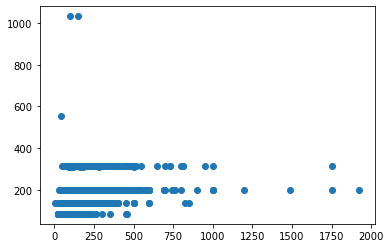

In [41]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y)

0.171682999574315

In [43]:
# ! conda install -c conda-forge xgboost
# from xgboost import XGBRegressor

In [44]:
import xgboost; print(xgboost.__version__)

1.3.3


In [45]:
from xgboost import XGBRegressor

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
scores = cross_val_score(XGBRegressor(), X_train, y_train, scoring='neg_mean_squared_error')

In [48]:
scores

array([-82228.98515995,  -6448.16823252, -10013.35483074, -19639.18792613,
       -42070.74151551])

In [49]:
xgb = XGBRegressor().fit(X_train, y_train)

In [51]:
xgb.score(X_train, y_train)

0.9457524516832455

In [52]:
y_test_pred = xgb.predict(X_test)
r2_score(y_test, y_test_pred)

-0.3180163565892493

In [53]:
y_train_pred = xgb.predict(X_train)
r2_score(y_train, y_train_pred)

0.9457524516832455

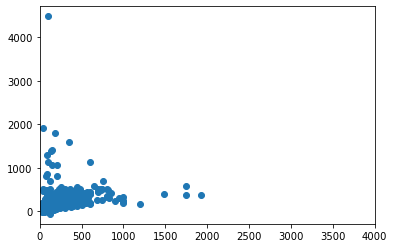

In [55]:
import matplotlib.pyplot as plt
plt.xlim(0, 4000)
plt.scatter(y_test, y_test_pred)

In [60]:
features = list(X.columns)
# df2_dummies[features]
df2_dummies['price_pred'] = xgb.predict(df2_dummies[features])
df2_dummies.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_

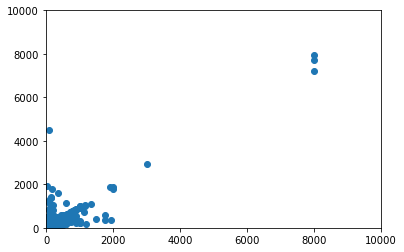

In [70]:
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.scatter(df2_dummies['price'], df2_dummies['price_pred'])

In [69]:
df2_dummies[df2_dummies['price_pred'] > 4000][['price', 'price_pred']]

,price,price_pred
87,8000.0,7964.173340
4419,7999.0,7208.638184
8730,94.0,4479.261719
15385,8000.0,7719.383301


In [71]:
print(df2_dummies.shape)
df2_dummies_v2 = df2_dummies[~((df2_dummies['price_pred'] > 4000) & (df2_dummies['price'] < 1000))]
print(df2_dummies_v2.shape)

(14725, 90)
(14724, 90)


In [72]:
print(r2_score(df2_dummies['price'], df2_dummies['price_pred']))
print(r2_score(df2_dummies_v2['price'], df2_dummies_v2['price_pred']))

0.756508539861926
0.8128828095971843


In [74]:
df2_dummies['error'] = 100 * (df2_dummies['price_pred']/df2_dummies['price'] - 1)
df2_dummies[['price', 'price_pred', 'error']].describe()

,price,price_pred,error
count,14725.000000,14725.000000,14725.000000
mean,153.195789,154.575256,10.885397
std,152.207041,144.002670,75.212354
min,4.000000,-57.860287,-165.011749
25%,95.000000,108.463745,-12.228387
50%,130.000000,137.515015,3.167973
75%,180.000000,179.710007,23.367965
max,8000.000000,7964.173340,4707.473145


<AxesSubplot:>

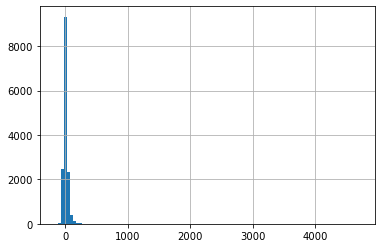

In [76]:
df2_dummies['error'].hist(bins = 100)
# it seems that the model might be predicting reasonably well for most observations

In [80]:
for i in range(3, 10, 2):
    print(i, end =" ")

3 5 7 9 

In [84]:
for i in range(1, 10, 1):
#     print(i/10)
    print(df2_dummies['error'].quantile(q=i/10))

-26.207591072273534
-16.288276507059734
-8.647755673057155
-2.699248882902765
3.1679732076237643
9.725394364899275
18.06860758463541
29.61054890950522
49.58882446289064
